In [6]:
import numpy as np
import pandas as pd
from matplotlib.image import imread
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<Figure size 432x288 with 0 Axes>

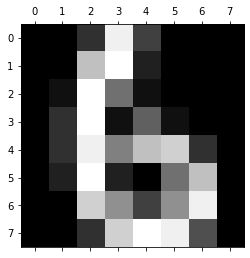

In [28]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[234])

In [15]:
one_hot = pd.get_dummies(digits.target)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, one_hot, test_size=0.1, random_state=42)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop,Adadelta
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor = 'accuracy',patience=2)
model = Sequential()
model.add(Dense(128,input_dim = X_train.shape[1],activation = 'sigmoid'))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))

In [70]:
model.compile(optimizer=Adadelta(),loss = 'categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs = 200,validation_data=[X_test,y_test],batch_size = 64,callbacks=[stop],verbose=1)

Train on 1617 samples, validate on 180 samples
Epoch 1/200
1617/1617 [==============================] - 0s 93us/step - loss: 1.3414e-04 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 2/200
1617/1617 [==============================] - 0s 43us/step - loss: 1.3373e-04 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9833
Epoch 3/200
1617/1617 [==============================] - 0s 28us/step - loss: 1.3331e-04 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9833


In [71]:
los = pd.DataFrame(model.history.history)

In [73]:
scores = model.evaluate(X_test,y_test)

180/180 [==============================] - 0s 44us/step


In [74]:
print(model.metrics_names[1],scores[1]*100)

accuracy 98.33333492279053


In [80]:
model.metrics_names

['loss', 'accuracy']

In [88]:
image_ar = np.expand_dims(digits.images[12],axis=0)

In [93]:
model.save('load_digits.h5')